In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from env import user, password, host
import os
from acquire import wrangle_store_data
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = wrangle_store_data()

In [3]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
df.shape # number of rows and columns

(913000, 14)

In [5]:
df.isnull().sum() # number null values in each column

store_id         0
item_id          0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
sale_id          0
sale_date        0
sale_amount      0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

- Convert date column to datetime format.

In [6]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   store_id       913000 non-null  int64         
 1   item_id        913000 non-null  int64         
 2   item_upc14     913000 non-null  int64         
 3   item_upc12     913000 non-null  int64         
 4   item_brand     913000 non-null  object        
 5   item_name      913000 non-null  object        
 6   item_price     913000 non-null  float64       
 7   sale_id        913000 non-null  int64         
 8   sale_date      913000 non-null  datetime64[ns]
 9   sale_amount    913000 non-null  int64         
 10  store_address  913000 non-null  object        
 11  store_zipcode  913000 non-null  int64         
 12  store_city     913000 non-null  object        
 13  store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(5

- Plot the distribution of sale_amount and item_price.

In [8]:
by_date = df.groupby(['sale_date','item_price']).sale_amount.sum().reset_index()
by_date.head()

,sale_date,item_price,sale_amount
0,2013-01-01,0.60,179
1,2013-01-01,0.68,237
2,2013-01-01,0.74,208
3,2013-01-01,0.84,133
4,2013-01-01,0.98,211


<AxesSubplot:xlabel='item_price', ylabel='Count'>

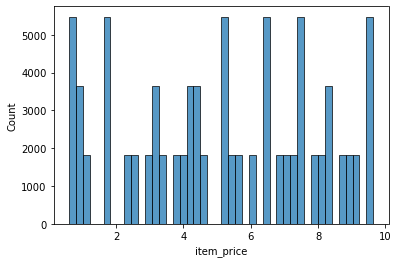

In [33]:
sns.histplot(by_date.item_price)

- Set the index to be the datetime variable.

In [10]:
# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

In [11]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX


- Add a 'month' and 'day of week' column to your dataframe.

In [12]:
df['month'] = df.index.month

In [14]:
df['weekday_name'] = df.index.day_name()

In [15]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,weekday_name
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,Tuesday
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday


Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [21]:
df['sales_total'] = df.sale_amount * df.item_price

In [22]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,weekday_name,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,25.16


In [34]:
def prep_store_data(df):
    # Reassign the sale_date column to be a datetime type
    df.sale_date = pd.to_datetime(df.sale_date)

    # Sort rows by the date and then set the index as that date
    df = df.set_index("sale_date").sort_index()
    return df

- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: 

In [25]:
df = pd.read_csv('/Users/yuviacardenas/codeup-data-science/time-series/opsd_germany_daily.csv')

In [26]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [27]:
df.shape # number of rows and columns

(4383, 5)

In [28]:
df.isnull().sum() # number null values in each column

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

- Fill any missing values.

In [29]:
# filled nulls with averages
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

In [30]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,164.8,89.3,272.7
1,2006-01-02,1380.521,164.8,89.3,272.7
2,2006-01-03,1442.533,164.8,89.3,272.7
3,2006-01-04,1457.217,164.8,89.3,272.7
4,2006-01-05,1477.131,164.8,89.3,272.7


- Convert date column to datetime format.

In [35]:
df.Date = pd.to_datetime(df.Date)

In [36]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,164.8,89.3,272.7
1,2006-01-02,1380.521,164.8,89.3,272.7
2,2006-01-03,1442.533,164.8,89.3,272.7
3,2006-01-04,1457.217,164.8,89.3,272.7
4,2006-01-05,1477.131,164.8,89.3,272.7


- Plot the distribution of each of your variables.

<AxesSubplot:xlabel='Consumption', ylabel='Count'>

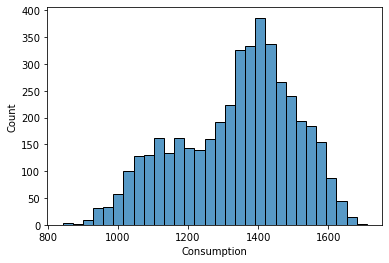

In [37]:
sns.histplot(df.Consumption)

<AxesSubplot:xlabel='Wind', ylabel='Count'>

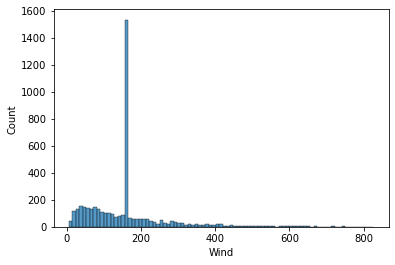

In [38]:
sns.histplot(df.Wind)

<AxesSubplot:xlabel='Solar', ylabel='Count'>

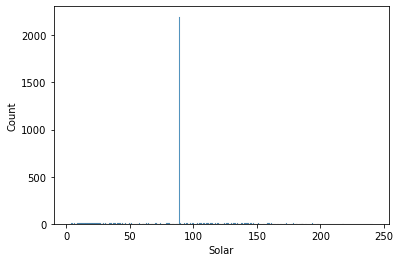

In [39]:
sns.histplot(df.Solar)

- Set the index to be the datetime variable.

In [40]:
# Sort rows by the date and then set the index as that date
df = df.set_index("Date").sort_index()

In [41]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,164.8,89.3,272.7
2006-01-02,1380.521,164.8,89.3,272.7
2006-01-03,1442.533,164.8,89.3,272.7
2006-01-04,1457.217,164.8,89.3,272.7
2006-01-05,1477.131,164.8,89.3,272.7


- Add a month and a year column to your dataframe.

In [42]:
df['month'] = df.index.strftime('%B')

In [44]:
df['year'] = df.index.strftime('%Y')

In [45]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,164.8,89.3,272.7,January,2006
2006-01-02,1380.521,164.8,89.3,272.7,January,2006
2006-01-03,1442.533,164.8,89.3,272.7,January,2006
2006-01-04,1457.217,164.8,89.3,272.7,January,2006
2006-01-05,1477.131,164.8,89.3,272.7,January,2006
